In [5]:
from __future__ import print_function

# $example on$
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline

In [129]:
df=pd.read_excel("file:////Users/venkateswarlusayana/ABDD/Bank_Personal_Loan_Modelling.xlsx", sheetname=1,header=0)

In [130]:
len(df)

5000

In [131]:
df.shape

(5000, 14)

In [132]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [133]:
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]

In [134]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 1)

In [136]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [137]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.98266666666666669

In [ ]:
We see an accuracy score of ~98.2%, which is significantly better than 50/50 guessing.

In [ ]:
#confusion matrix:

In [139]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['personalLoan Not approval', 'Personal Loan approval '],
    index=[' Not approval', 'approval ']
)

,personalLoan Not approval,Personal Loan approval
Not approval,1339,12
approval,14,135


In [160]:
X.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [191]:
tree.export_graphviz(model, out_file="tree.dot", feature_names=X.columns)

In [192]:
from subprocess import call

call(['dot', '-T', 'png', 'file:////Users/venkateswarlusayana/tree.dot', '-o', 'file:////Users/venkateswarlusayana/ABDD/tree1.png'])

2

In [199]:
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0

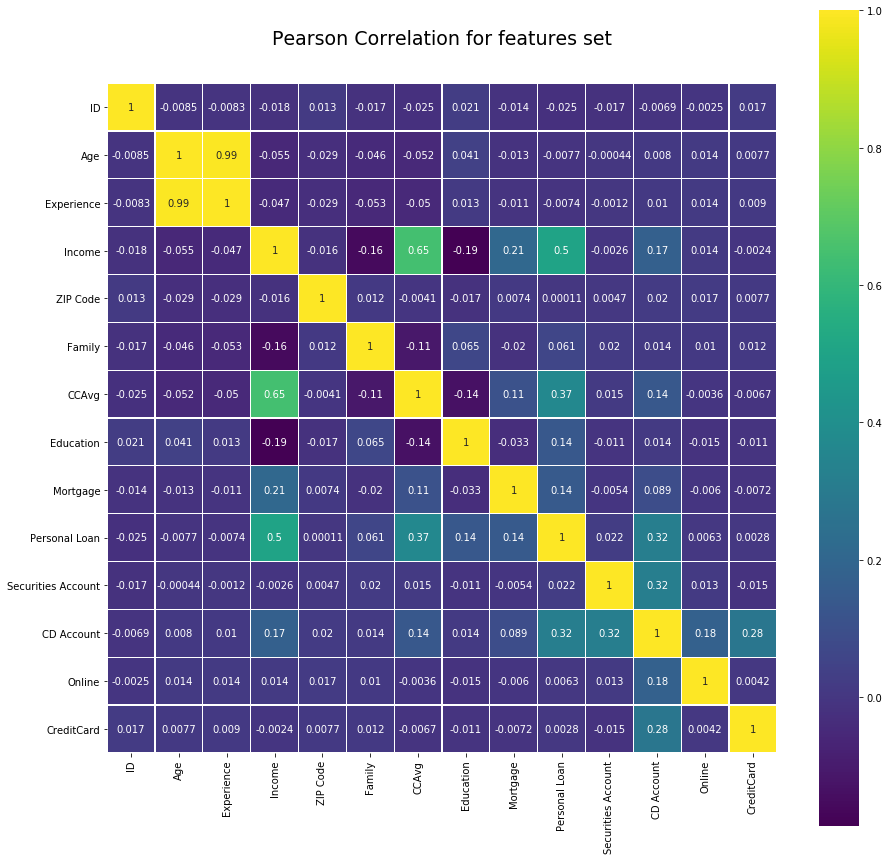

In [194]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation for features set', y=1.05, size=19)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)